绘制intra-consistency，inter-consistency的ablation study结果
2行3列的子图，行表示mask pattern，列表示metric，每个子图有3组，组别代表数据集，每组有4个柱子（original，wointra，wointer，woall）

绘制3个1行3列的子图，每个图两个纵坐标轴刻度，分别对应point和block的，三个子图分别对应MAE,RMSE和MAPE。

ETTm1

meta NOT subset; don't know how to subset; dropped


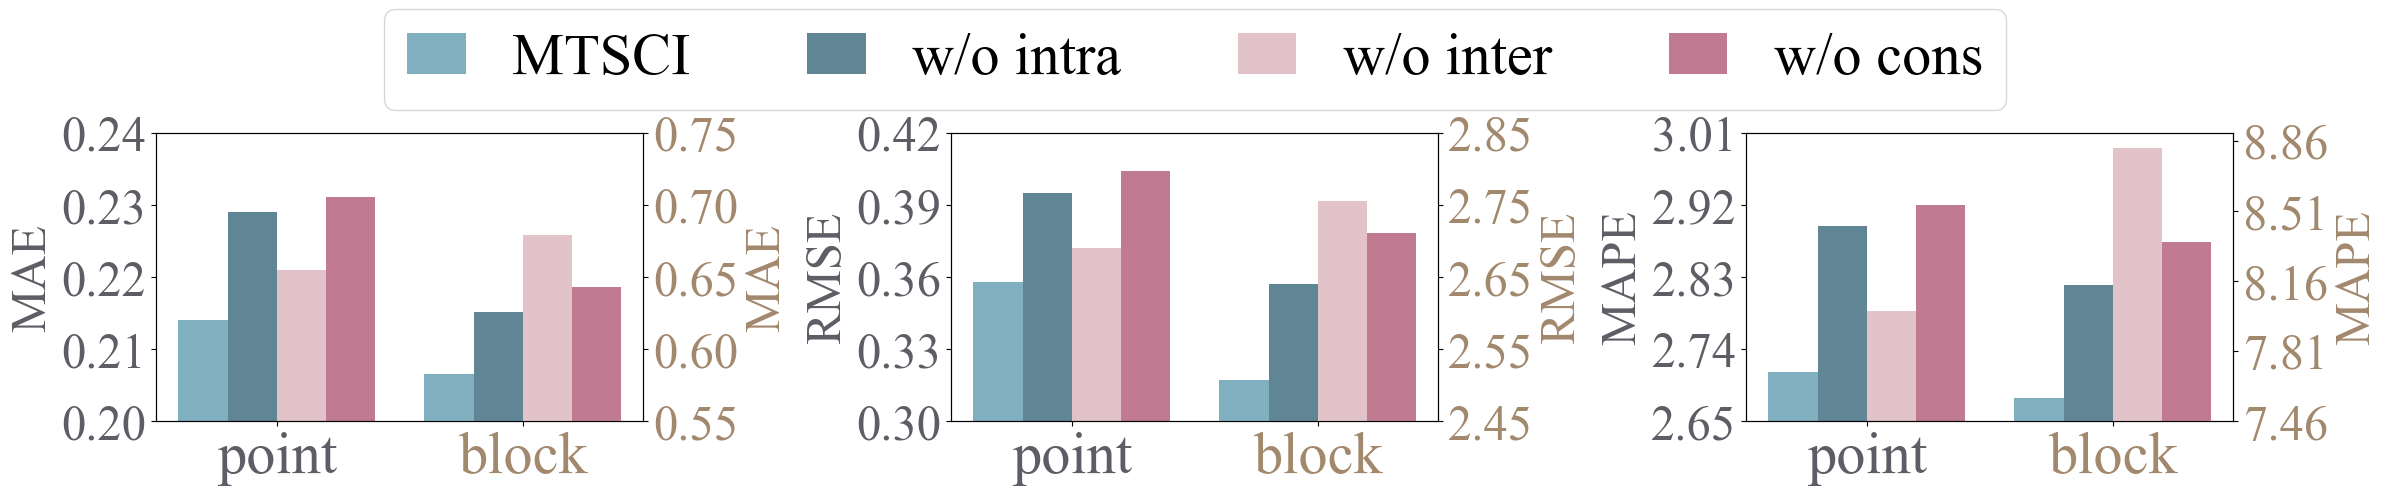

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# results
ETTm1_maes={'MTSCI': [0.214,0.583], 'w/o intra': [0.229,0.626],'w/o inter': [0.221,0.679],'w/o cons': [0.231,0.643]}
ETTm1_rmses={'MTSCI': [0.358,2.507], 'w/o intra': [0.395,2.640],'w/o inter': [0.372,2.755],'w/o cons': [0.404,2.711]}
ETTm1_mapes={'MTSCI': [2.711,7.575], 'w/o intra': [2.894,8.138],'w/o inter': [2.787,8.822],'w/o cons': [2.920,8.355]}

mask_patterns = ("point","block")

fig, ax = plt.subplots(1,3,figsize=(24,4))

colors=colors=['#80AFBF','#608595','#E2C3C9','#C07A92',]
color1='#5E5D65'
color2='#A2886D'
tick_label_font_size=35

x = np.arange(len(mask_patterns))  # the label locations
width = 0.2  # the width of the bars

## ETTm1
### MAE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_maes.items():
    offset = width * multiplier
    rects = ax[0].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax0_=ax[0].twinx()
for attribute, metric in ETTm1_maes.items():
    offset = width * multiplier
    rects = ax0_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[0].tick_params(axis='x', labelsize=tick_label_font_size)
ax[0].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[0].set_ylabel('MAE', fontsize=tick_label_font_size, color=color1)
ax[0].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[0].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[0].set_ylim(0.2, 0.24)
ax[0].set_yticks(np.arange(0.2, 0.25,0.01))
ax0_.set_ylabel('MAE',fontsize=tick_label_font_size,color=color2)
ax0_.set_ylim(0.55, 0.75)
ax0_.set_yticks(np.arange(0.55, 0.80, 0.05))
ax0_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)
# ax[0].grid(linestyle='dashed')
# ax[0].legend(loc='upper center',fontsize=30, handlelength=1,ncol=4,bbox_to_anchor=(1.5, 1.3))

### RMSE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_rmses.items():
    offset = width * multiplier
    rects = ax[1].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax1_=ax[1].twinx()
for attribute, metric in ETTm1_rmses.items():
    offset = width * multiplier
    rects = ax1_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[1].tick_params(axis='x', labelsize=tick_label_font_size)
ax[1].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[1].set_ylabel('RMSE', fontsize=tick_label_font_size, color=color1)
ax[1].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[1].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[1].set_ylim(0.30, 0.42)
ax[1].set_yticks(np.arange(0.30, 0.44, 0.03))
ax1_.set_ylabel('RMSE',fontsize=tick_label_font_size,color=color2)
ax1_.set_ylim(2.45, 2.85)
ax1_.set_yticks(np.arange(2.45, 2.95, 0.1))
ax1_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)
# ax[1].grid(linestyle='dashed')

### MAPE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_mapes.items():
    offset = width * multiplier
    rects = ax[2].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax2_=ax[2].twinx()
lines=[]
for attribute, metric in ETTm1_mapes.items():
    offset = width * multiplier
    rects = ax2_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1
    lines.append(rects)

ax[2].tick_params(axis='x', labelsize=tick_label_font_size)
ax[2].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[2].set_ylabel('MAPE', fontsize=tick_label_font_size, color=color1)
ax[2].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[2].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[2].set_ylim(2.65, 3.0)
ax[2].set_yticks(np.arange(2.65, 3.05, 0.09))
ax2_.set_ylabel('MAPE',fontsize=tick_label_font_size,color=color2)
ax2_.set_ylim(7.5, 8.9)
ax2_.set_yticks(np.arange(7.46, 8.9, 0.35))
ax2_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)
# ax[2].grid(linestyle='dashed')

fig.legend(handles=lines,loc='upper center',fontsize=42, handlelength=1,ncol=4, bbox_to_anchor=(0.5,1.3))
# ax[1].legend(loc='upper center',fontsize=42, handlelength=1,ncol=4, bbox_to_anchor=(0.5, 1.6))
# plt.subplots_adjust(hspace=1)
plt.tight_layout()
# plt.legend(loc='upper center', ncols=3, fontsize=55)
plt.savefig('../img/ablation_study_ETTm1.pdf',dpi=300,bbox_inches='tight')
plt.savefig('../img/ablation_study_ETTm1.svg',dpi=300,bbox_inches='tight')
plt.show()

Weather

meta NOT subset; don't know how to subset; dropped


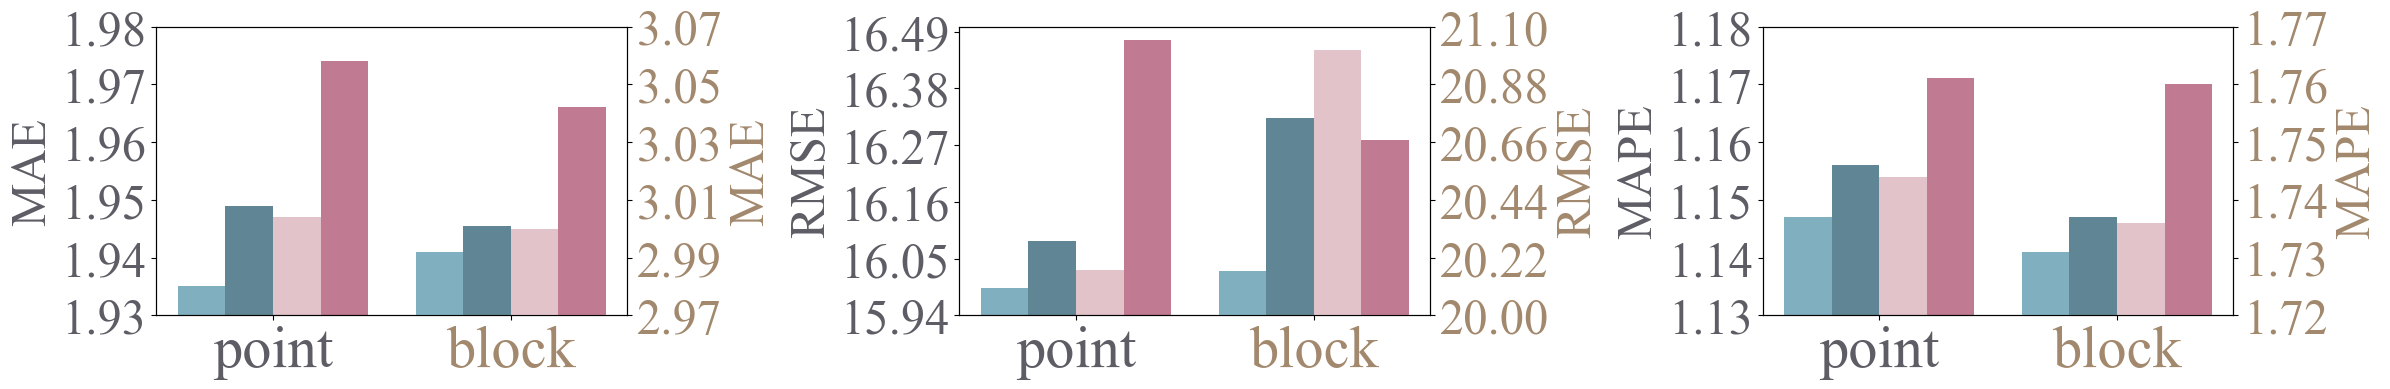

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# results
Weather_maes={'MTSCI': [1.935,2.992], 'w/o intra': [1.949,3.001],'w/o inter': [1.947,3.000],'w/o cons': [1.974,3.042]}
Weather_rmses={'MTSCI': [15.992,20.170], 'w/o intra': [16.085,20.753],'w/o inter': [16.028,21.010],'w/o cons': [16.473,20.669]}
Weather_mapes={'MTSCI': [1.147,1.731], 'w/o intra': [1.156,1.737],'w/o inter': [1.154,1.736],'w/o cons': [1.171,1.760]}

mask_patterns = ("point","block")

fig, ax = plt.subplots(1,3,figsize=(24,4))

colors=['#80AFBF','#608595','#E2C3C9','#C07A92',]
color1='#5E5D65'
color2='#A2886D'
tick_label_font_size=35

x = np.arange(len(mask_patterns))  # the label locations
width = 0.2  # the width of the bars

## Weather
### MAE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_maes.items():
    offset = width * multiplier
    rects = ax[0].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax0_=ax[0].twinx()
for attribute, metric in Weather_maes.items():
    offset = width * multiplier
    rects = ax0_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[0].tick_params(axis='x', labelsize=tick_label_font_size)
ax[0].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[0].set_ylabel('MAE', fontsize=tick_label_font_size, color=color1)
ax[0].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[0].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[0].set_ylim(1.93, 1.97)
ax[0].set_yticks(np.arange(1.93, 1.98,0.01))
ax0_.set_ylabel('MAE',fontsize=tick_label_font_size,color=color2)
ax0_.set_ylim(2.97, 3.07)
ax0_.set_yticks(np.arange(2.97, 3.08, 0.02))
ax0_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

### RMSE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_rmses.items():
    offset = width * multiplier
    rects = ax[1].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax1_=ax[1].twinx()
for attribute, metric in Weather_rmses.items():
    offset = width * multiplier
    rects = ax1_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[1].tick_params(axis='x', labelsize=tick_label_font_size)
ax[1].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[1].set_ylabel('RMSE', fontsize=tick_label_font_size, color=color1)
ax[1].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[1].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[1].set_ylim(15.98, 16.50)
ax[1].set_yticks(np.arange(15.94, 16.55, 0.11))
ax1_.set_ylabel('RMSE',fontsize=tick_label_font_size,color=color2)
ax1_.set_ylim(20.00, 21.10)
ax1_.set_yticks(np.arange(20.00, 21.10,0.22))
ax1_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

### MAPE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_mapes.items():
    offset = width * multiplier
    rects = ax[2].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax2_=ax[2].twinx()
lines=[]
for attribute, metric in Weather_mapes.items():
    offset = width * multiplier
    rects = ax2_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1
    lines.append(rects)

ax[2].tick_params(axis='x', labelsize=tick_label_font_size)
ax[2].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[2].set_ylabel('MAPE', fontsize=tick_label_font_size, color=color1)
ax[2].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[2].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[2].set_ylim(1.13, 1.18)
ax[2].set_yticks(np.arange(1.13, 1.18, 0.01))
ax2_.set_ylabel('MAPE',fontsize=tick_label_font_size,color=color2)
ax2_.set_ylim(1.72, 1.77)
ax2_.set_yticks(np.arange(1.72,1.77,0.01))
ax2_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

# fig.legend(handles=lines,loc='upper center',fontsize=42, handlelength=1,ncol=4, bbox_to_anchor=(0.5,1.3))
plt.tight_layout()
plt.savefig('../img/ablation_study_Weather.pdf',dpi=300,bbox_inches='tight')
plt.savefig('../img/ablation_study_Weather.svg',dpi=300,bbox_inches='tight')
plt.show()

METR-LA

meta NOT subset; don't know how to subset; dropped


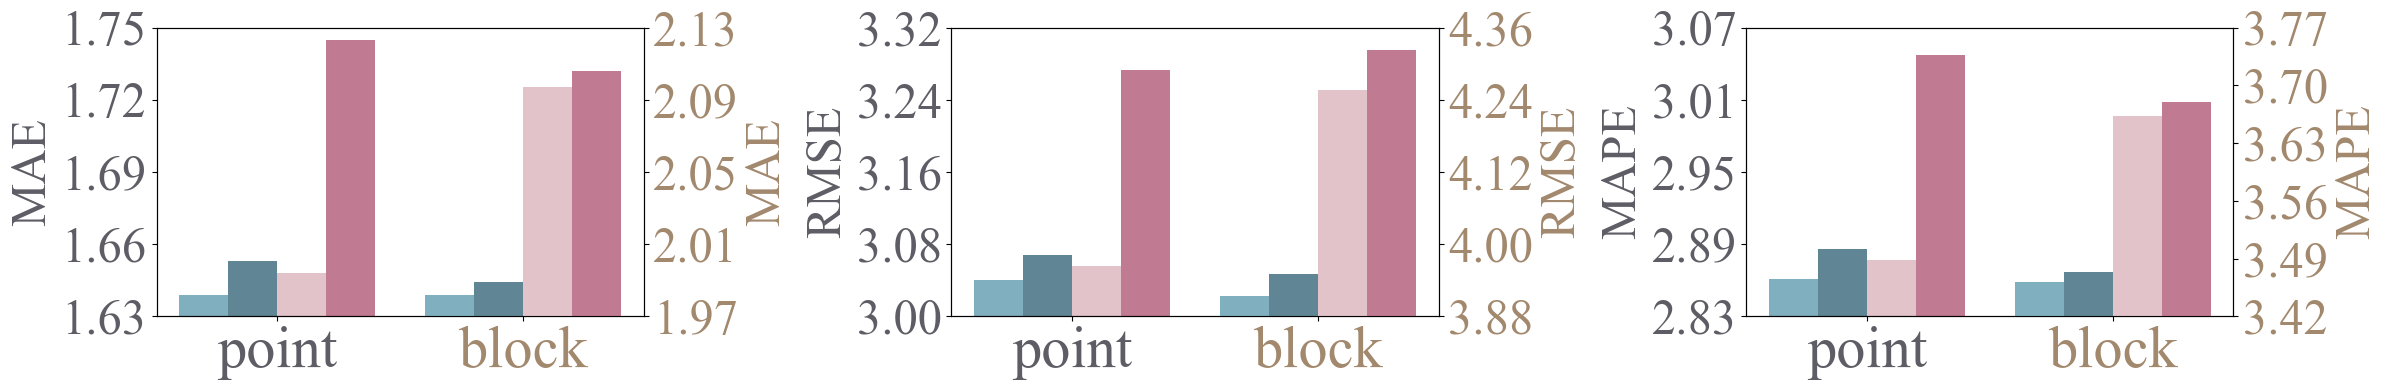

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# results
METRLA_maes={'MTSCI': [1.639,1.982], 'w/o intra': [1.653,1.989],'w/o inter': [1.648,2.097],'w/o cons': [1.745,2.106]}
METRLA_rmses={'MTSCI': [3.040,3.914], 'w/o intra': [3.068,3.950],'w/o inter': [3.056,4.256],'w/o cons': [3.273,4.323]}
METRLA_mapes={'MTSCI': [2.861,3.462], 'w/o intra': [2.886,3.474],'w/o inter': [2.877,3.663],'w/o cons': [3.047,3.680]}

mask_patterns = ("point","block")

fig, ax = plt.subplots(1,3,figsize=(24,4))

# colors=sns.color_palette("Set3")
colors=['#80AFBF','#608595','#E2C3C9','#C07A92',]
color1='#5E5D65'
color2='#A2886D'
tick_label_font_size=35

x = np.arange(len(mask_patterns))  # the label locations
width = 0.2  # the width of the bars

## METRLA
### MAE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_maes.items():
    offset = width * multiplier
    rects = ax[0].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax0_=ax[0].twinx()
for attribute, metric in METRLA_maes.items():
    offset = width * multiplier
    rects = ax0_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[0].tick_params(axis='x', labelsize=tick_label_font_size)
ax[0].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[0].set_ylabel('MAE', fontsize=tick_label_font_size, color=color1)
ax[0].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[0].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[0].set_ylim(1.63, 1.75)
ax[0].set_yticks(np.arange(1.63, 1.75,0.03))
ax0_.set_ylabel('MAE',fontsize=tick_label_font_size,color=color2)
ax0_.set_ylim(1.97, 2.12)
ax0_.set_yticks(np.arange(1.97, 2.14,0.04))
ax0_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

### RMSE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_rmses.items():
    offset = width * multiplier
    rects = ax[1].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax1_=ax[1].twinx()
for attribute, metric in METRLA_rmses.items():
    offset = width * multiplier
    rects = ax1_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

ax[1].tick_params(axis='x', labelsize=tick_label_font_size)
ax[1].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[1].set_ylabel('RMSE', fontsize=tick_label_font_size, color=color1)
ax[1].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[1].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[1].set_ylim(3.00, 3.30)
ax[1].set_yticks(np.arange(3.00,3.35,0.08))
ax1_.set_ylabel('RMSE',fontsize=tick_label_font_size,color=color2)
ax1_.set_ylim(3.90,4.35)
ax1_.set_yticks(np.arange(3.88,4.39,0.12))
ax1_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

### MAPE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_mapes.items():
    offset = width * multiplier
    rects = ax[2].bar(x[0]+offset, metric[0:1], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1

i=0
multiplier = -0.5
ax2_=ax[2].twinx()
lines=[]
for attribute, metric in METRLA_mapes.items():
    offset = width * multiplier
    rects = ax2_.bar(x[1]+offset, metric[1:2], width, label=attribute, color=colors[i])
    multiplier += 1
    i+=1
    lines.append(rects)

ax[2].tick_params(axis='x', labelsize=tick_label_font_size)
ax[2].tick_params(axis='y', labelsize=tick_label_font_size, labelcolor=color1)
ax[2].set_ylabel('MAPE', fontsize=tick_label_font_size, color=color1)
ax[2].set_xticks(x+ width, mask_patterns, fontsize=42)
for label in ax[2].get_xticklabels():
    if label.get_text() in ['point']:
        label.set_color(color1)
    else:
        label.set_color(color2)
ax[2].set_ylim(2.85, 3.05)
ax[2].set_yticks(np.arange(2.83, 3.10, 0.06))
ax2_.set_ylabel('MAPE',fontsize=tick_label_font_size,color=color2)
ax2_.set_ylim(3.45, 3.70)
ax2_.set_yticks(np.arange(3.42,3.79,0.07))
ax2_.tick_params(axis='y', labelsize=tick_label_font_size,labelcolor=color2)

# fig.legend(handles=lines,loc='upper center',fontsize=42, handlelength=1,ncol=4, bbox_to_anchor=(0.5,1.3))
plt.tight_layout()
plt.savefig('../img/ablation_study_METRLA.pdf',dpi=300,bbox_inches='tight')
plt.savefig('../img/ablation_study_METRLA.svg',dpi=300,bbox_inches='tight')
plt.show()